In [ ]:
Lab_4
TianranZhang
The github reposirory link is https://github.com/Creatran/Lab_4.git

1. Read in both the microarray data and the labels of the cancer type.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
NCI60_data = pd.read_csv('NCI60_data.csv')
NCI60_labs = pd.read_csv('NCI60_labs.csv')

2. PCA analysis

In [24]:
# NCI60_data

In [19]:
# Scale
X = NCI60_data.iloc[:, 1:]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

x_scaled = scaler.transform(X)

In [20]:
# Perform PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

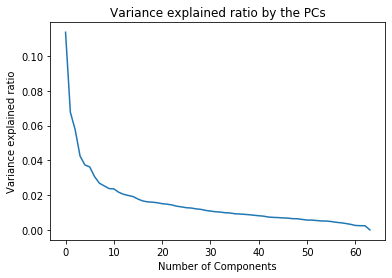

In [95]:
# Plot the variance explained by the PCs.
components = np.arange(0, 64)
plt.plot(components, pca.explained_variance_ratio_)
plt.xlabel("Number of Components")
plt.ylabel("Variance explained ratio")
plt.title("Variance explained ratio by the PCs")
plt.show()

Text(0.5, 1.0, 'Cumulative variance explained ratio by the PCs')

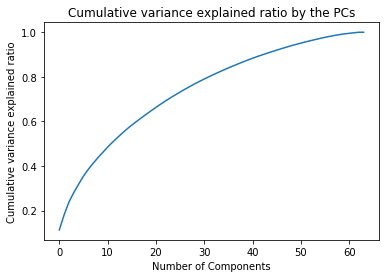

In [23]:
# Plot the cumulative variance explained by the PCs
plt.plot(components, np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative variance explained ratio")
plt.title("Cumulative variance explained ratio by the PCs")

There are 64 PCs produced in the analysis. From the cumulative variance explained ratio plot we could see that approximately 40 PCs are required to explain 90% of the variance in the data.

3. Plot the scores

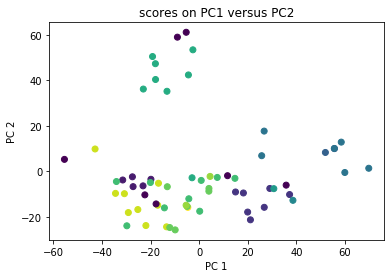

In [36]:
# Plot the scores on the first versus second PC and color the scores by cancer type.
pca_scores = pca.fit_transform(x_scaled)

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], c = LE.fit_transform(y))
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("scores on PC1 versus PC2")
plt.show()

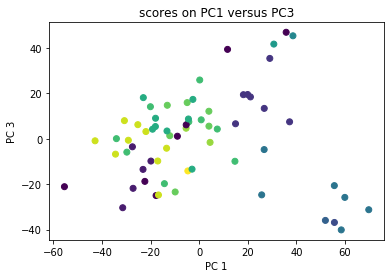

In [37]:
# Plot the scores on the first versus third PC and color the scores by cancer type.
plt.scatter(pca_scores[:, 0], pca_scores[:, 2], c = LE.fit_transform(y))
plt.xlabel("PC 1")
plt.ylabel("PC 3")
plt.title("scores on PC1 versus PC3")
plt.show()

All the points are mixed up, it seems like only two principle components can not describe the plot well.

4. Perform clustering on the data.

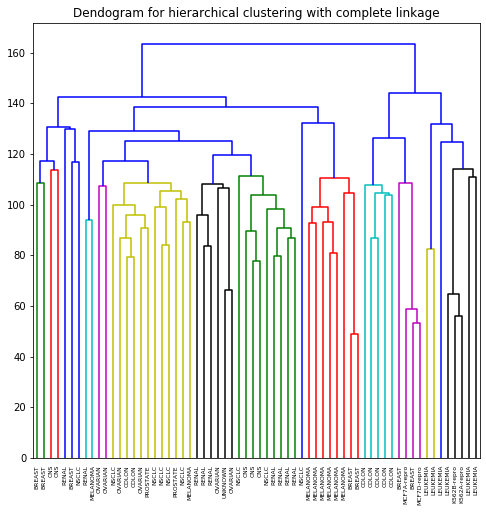

In [84]:
# Visualize the dendogram for hierarchical clustering with complete linkage
import scipy.cluster.hierarchy as shc

lab = [i for i in y]
fig = plt.figure(figsize = (8, 8))
dend = shc.dendrogram(shc.linkage(x_scaled, method = "complete"), labels = lab)
plt.title('Dendogram for hierarchical clustering with complete linkage')
plt.show()

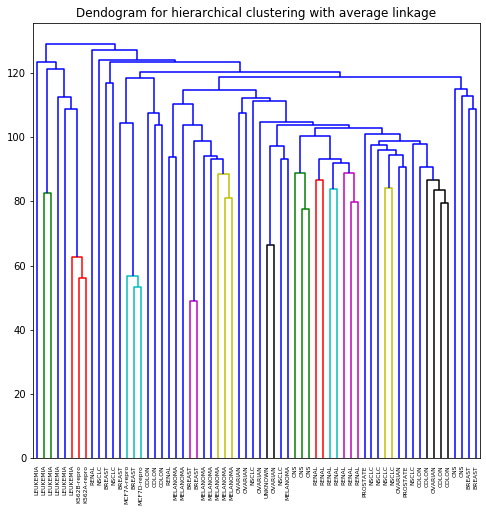

In [82]:
# Visualize the dendogram for hierarchical clustering with average linkage
fig = plt.figure(figsize = (8, 8))
dend = shc.dendrogram(shc.linkage(x_scaled, method = "average"), labels = lab)
plt.title('Dendogram for hierarchical clustering with average linkage')
plt.show()

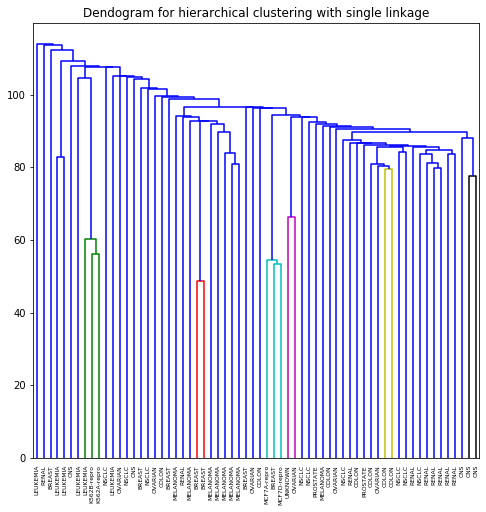

In [83]:
# Visualize the dendogram for hierarchical clustering with single linkage
fig = plt.figure(figsize = (8, 8))
dend = shc.dendrogram(shc.linkage(x_scaled, method = "single"), labels = lab)
plt.title('Dendogram for hierarchical clustering with single linkage')
plt.show()

The choice of linkage will impact the results. The complete linkage seems more evenly in clustering the variables.?

5. Cluster the observations into 4 groups using complete linkage.

In [89]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')
cluster_result = cluster.fit_predict(x_scaled)
outcome = pd.crosstab(y, cluster_result)
outcome.columns = ['Clustering Group 0', 'Clustering Group 1', 'Clustering Group 2', 'Clustering Group 3']
outcome

,Clustering Group 0,Clustering Group 1,Clustering Group 2,Clustering Group 3
x,,,,
BREAST,2,0,2,3
CNS,3,0,0,2
COLON,2,0,5,0
K562A-repro,0,1,0,0
K562B-repro,0,1,0,0
LEUKEMIA,0,6,0,0
MCF7A-repro,0,0,1,0
MCF7D-repro,0,0,1,0
MELANOMA,8,0,0,0


Look at the labels for each of the groups and comment on the success of the clustering
All the items in MELANOMA, OVARIAN, PROSTATE, and nost items in CNS, NSCLC, OVARIAN, and RENAL are clustered in one group (Clustering Group 0)

6. Perform hierarchical clustering on the first few principal component score veators.

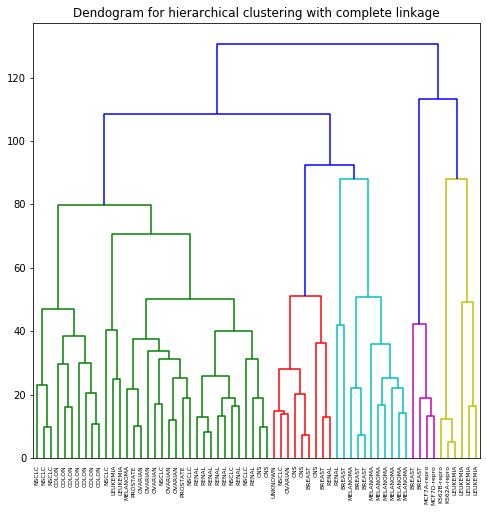

In [91]:
# Perform hierarchical clustering on the first 5 principal component score veators.
fig = plt.figure(figsize = (8, 8))
dend = shc.dendrogram(shc.linkage(pca_scores[:, 0:5], method = "complete"), labels = lab)
plt.title('Dendogram for hierarchical clustering on the first 5 principal component score vectors')
plt.show()

The dendogram for hierachical looks better in determining the number of clusters.